# Keras terms

Keras API can be divided into 3 main caregories -
1. Model - The NN is represented as model
    * Sequential - Linear compostion of Keras
    * Functional - Create complex models
2. Layers - Model is composed of layers
    * Core 
    * Convolution 
    * Pooling
    * Recurrent
3. Core Modules - Activations, Optimizer, Loss, Regularizer, Backend etc

https://www.tutorialspoint.com/keras/keras_quick_guide.htm

# TF2 Intro
https://www.youtube.com/watch?time_continue=2&v=5ECD8J3dvDQ&feature=emb_logo

In [1]:
import tensorflow as tf
#import os
#os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import keras as k

Using TensorFlow backend.


In [13]:
hello = tf.constant("Hello Tensorflow!")
print(hello)

a = tf.constant(1, dtype=tf.float32)
b = tf.constant(1, dtype=tf.float32)
print(a+b)

tf.Tensor(b'Hello Tesnoflow!', shape=(), dtype=string)
tf.Tensor(2.0, shape=(), dtype=float32)


In [18]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x*x
dy_dx = g.gradient(y,x) #2x @x~3 = 6
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


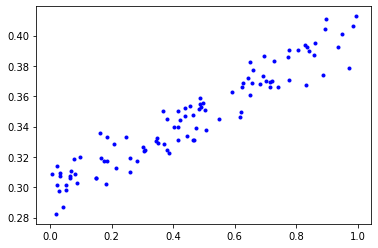

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras import Model

def make_noisy_data(m=0.1, b=0.3, n=100):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x),), stddev=0.01)
    y = m*x+b+noise
    return x,y

x_train, y_train = make_noisy_data()

plt.plot(x_train, y_train, 'b.')

In [33]:
m = tf.Variable(0.)
b = tf.Variable(0.)
#predict y given x
def predict(x):
    y = m*x+b
    return y

#loss
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred-y_true))

#loss before training
loss = squared_error(predict(x_train), y_train)
print(loss)
print(loss.numpy())

learning_rate = 0.05
steps = 200

for i in range(steps):
    
    with tf.GradientTape() as tape:
        predictions = predict(x_train)
        loss = squared_error(predictions, y_train)
        
    gradients = tape.gradient(loss, [m,b])
    
    m.assign_sub(gradients[0]*learning_rate)
    b.assign_sub(gradients[1]*learning_rate)
    
    if i%20 == 0:
        print("step %d loss %f"%(i, loss.numpy()))
        
print("m:%f , b:%f"%(m.numpy(), b.numpy()))

tf.Tensor(0.120543025, shape=(), dtype=float32)
0.120543025
step 0 loss 0.120543
step 20 loss 0.000805
step 40 loss 0.000141
step 60 loss 0.000126
step 80 loss 0.000118
step 100 loss 0.000111
step 120 loss 0.000106
step 140 loss 0.000102
step 160 loss 0.000099
step 180 loss 0.000097
m:0.114399 , b:0.293300


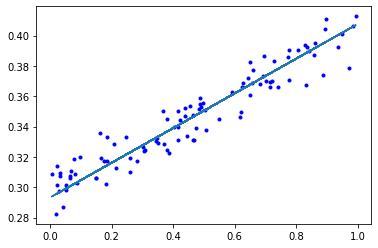

In [36]:
plt.plot(x_train, y_train, "b.")
plt.plot(x_train, predict(x_train))

# TF2 Beginner

https://www.tensorflow.org/tutorials/quickstart/beginner


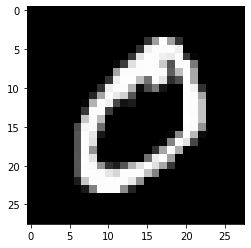

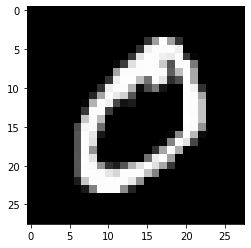

0
(60000, 28, 28)


In [68]:
#MNIST
tf.keras.backend.set_floatx('float64')
tf.random.set_seed(1)
import matplotlib.pyplot as plt
%matplotlib inline
mnist = tf.keras.datasets.mnist
(x_tr, y_tr),(x_t, y_t) = mnist.load_data()
x_tr2, x_t2 = x_tr/255.0, x_t/255.0

# plot the sample
fig = plt.figure
plt.imshow(x_tr[1], cmap='gray')
plt.show()
plt.imshow(x_tr2[1:2][0], cmap='gray')
plt.show()
print(y_tr[1])
print(x_tr2.shape)

In [69]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
"""
model = tf.keras.models.Sequential();
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
"""
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [72]:
preds = model(x_tr2[:1]).numpy()
print("preds")
print(preds)
"""
Note: It is possible to bake this tf.nn.softmax in as the activation function for the last layer of the network. 
While this can make the model output more directly interpretable, this approach is discouraged as it's 
impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.
"""
print("preds softmax")
print(tf.nn.softmax(preds).numpy())
print("preds loss")
print(loss_fn(y_tr[:1], preds).numpy())

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

preds
[[-0.22892294 -0.0554791  -0.36897684 -0.31703832 -0.05636311 -0.37768833
   0.00168194 -0.45457253 -0.35064929 -0.76820382]]
preds softmax
[[0.10470774 0.12453875 0.09102363 0.09587619 0.12442871 0.09023413
  0.13186491 0.08355654 0.09270725 0.06106215]]
preds loss
2.4053475856781006


In [75]:
model.fit(x_tr2, y_tr, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1957 - accuracy: 0.9416
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1575 - accuracy: 0.9533
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1392 - accuracy: 0.9574
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1255 - accuracy: 0.9618
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1137 - accuracy: 0.9651


In [92]:
model.evaluate(x_t2,  y_t, verbose=2)
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

10000/10000 - 0s - loss: 0.0915 - accuracy: 0.9728


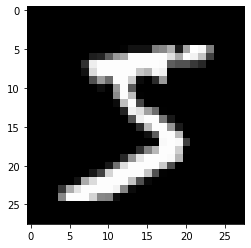

[[9.64033614e-12 1.72520031e-09 2.38042358e-09 6.41566098e-03
  1.59150886e-18 9.93561966e-01 3.82731284e-13 4.23931812e-12
  4.96843930e-09 2.23639585e-05]]


In [91]:
plt.imshow(x_tr2[:1][0], cmap='gray')
plt.show()
print(probability_model(x_tr2[:1]).numpy())

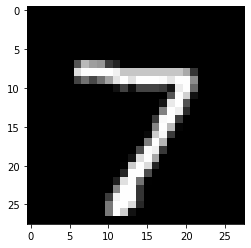

[[3.49446304e-08 2.27896803e-08 1.76932400e-06 1.86201376e-05
  9.88824037e-13 1.07212797e-07 5.73346872e-13 9.99974347e-01
  1.19466591e-07 4.97930863e-06]]


In [88]:
plt.imshow(x_t2[:1][0], cmap='gray')
plt.show()
print(probability_model(x_t2[:1]).numpy())

# TF2 Advanced
https://www.tensorflow.org/tutorials/quickstart/advanced

In [97]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

# Add a channels dimension
x_tr3 = x_tr2[..., tf.newaxis]
x_t3 = x_t2[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_tr3, y_tr)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_t3, y_t)).batch(32)

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10)
    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

# Create an instance of the model
model = MyModel()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)
    
@tf.function
def test_step(images, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [98]:
EPOCHS = 1
for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
    
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(
        template.format(epoch + 1,
        train_loss.result(),
        train_accuracy.result() * 100,
        test_loss.result(),
        test_accuracy.result() * 100))

Epoch 1, Loss: 0.1334869528900211, Accuracy: 95.97, Test Loss: 0.062299293317696666, Test Accuracy: 97.92
